# Simple Linear Regression

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Consider a sample data for a simple linear regression where we predict height based on weight.

In [7]:
data = {
    'Weight': [45,58,48,60,70,78,80,90,95,78,82,95,105,100,85,78,50,65,76,87,45,56,72],
    'Height': [120,135,123,145,160,162,163,175,182,170,176,182,175,183,170,177,140,159,150,167,129,140,160],
}

In [8]:
df = pd.DataFrame(data)

In [9]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Now we find the relationship between height and weight, you can use statistical and machine learning techniques that quantify and interpret the association between these two variables. 

**Scatter plot** gives an initial visual indication of the relationship. If there is a trend where the height increases as weight increases, this suggests a positive correlation.

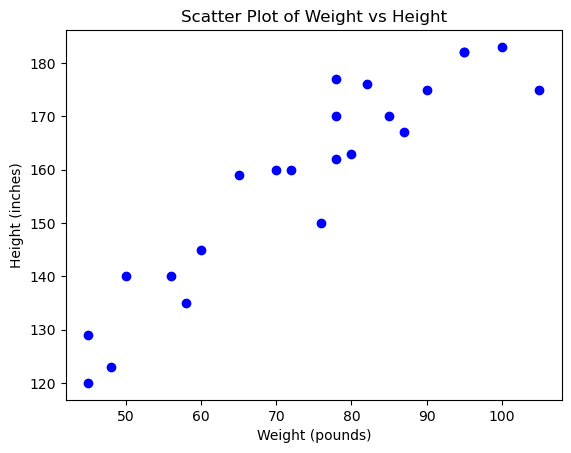

In [10]:
plt.scatter(df['Weight'], df['Height'], color='blue')
plt.xlabel('Weight (pounds)')
plt.ylabel('Height (inches)')
plt.title('Scatter Plot of Weight vs Height')
plt.show()

### Correlation (Pearson's Correlation)
Correlation quantifies the linear relationship between two variables, ranging from -1 to 1. 
A value 
- closer to 1 suggests a strong positive relationship 
- closer to -1 suggests a strong negative relationship
- close to 0 indicates no linear relationship.

In [12]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [13]:
correlation = df['Weight'].corr(df['Height'])
print("Correlation coefficient between Weight and Height :", correlation)

Correlation coefficient between Weight and Height : 0.9311418034329901


Here the value *0.9311418034329901* is closer to 1, so it is strongly positively corelated.

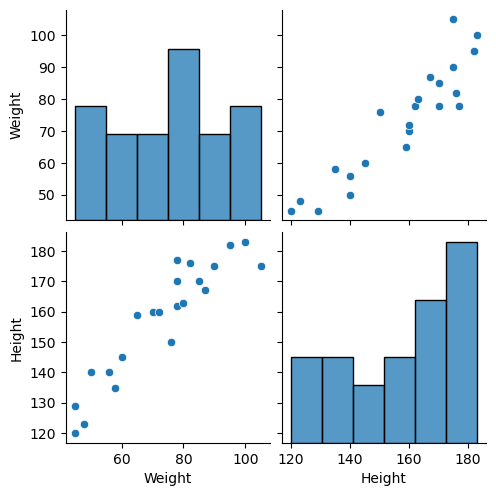

In [16]:
# We can also use seaborn for visualization 
import seaborn as sns
sns.pairplot(df)

### Split Independent and dependent features

In [24]:
X=df[['Weight']]    # independent features should be data frame or 2 dimesnionalarray
y=df['Height']      # this variiable can be in series or 1d array

In [25]:
np.array(X).shape

(23, 1)

In [26]:
np.array(y).shape

(23,)

### Split data into training and testing sets

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
X_train.shape # it should be 2 dimentional

(17, 1)

### preprocessing steps like scaling (using StandardScaler, MinMaxScaler, etc.) 

Require the model to learn certain statistical properties of the data before transforming it. This process is typically done on the training data to avoid data leakage and ensure the model generalizes well to unseen data.

#### Standardization
Standardization is a technique used in data preprocessing to scale the features of a dataset so that they have a **mean of 0 and a standard deviation of 1**. 

This is especially useful for algorithms that rely on feature magnitudes and distributions, such as linear regression, SVM, or k-means clustering. 

By standardizing, we ensure that each feature contributes equally to the model, preventing features with larger scales from dominating the learning process.

https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)

When standardizing data, fit_transform calculates the mean and standard deviation of the training data and then scales it accordingly.

This method is typically used on the training data in preprocessing, as we need to learn the scaling parameters (or other statistics) only once from the training data.

In [36]:
X_train_scaled

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [37]:
X_test_scaled = scaler.transform(X_test)

transform only applies the transformation using the parameters learned during fit. It does not recalculate any parameters.

This is used on test or validation data (or any new data) after the transformer has already been fitted on the training data. This ensures that the scaling/transforming uses the parameters learned from the training data, avoiding any data leakage from the test data.

**Why This Distinction Matters:**

Using fit_transform on test data can introduce data leakage, where information from the test set influences the model training process, leading to overly optimistic results that may not generalize well. By using transform on test data, you ensure that the model’s performance reflects how it will handle new, unseen data.

In [38]:
X_test_scaled

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

#### Apply Simple Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
# Initialize and fit the linear regression model
regression_model = LinearRegression(n_jobs=-1)
regression_model.fit(X_train_scaled, y_train)

LinearRegression(n_jobs=-1)

In [44]:
coefficient_or_slope = regression_model.coef_
intercept = regression_model.intercept_

In [45]:
print(f'Coefficient or slope: {coefficient_or_slope}')
print(f"Intercept: {intercept}")

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


### Prediction of the test data

predicted_height_output= intercept + coef_(Weights)

y_pred_test = 156.470 + 17.29(X_test)

In [53]:
y_pred=regression_model.predict(X_test_scaled)

In [54]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

### Evaluate the model's performance

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_squared_error=mean_squared_error(y_test,y_pred)
mean_squared_absolute_error=mean_absolute_error(y_test,y_pred)
root_mean_squared_error=np.sqrt(mean_squared_absolute_error)

In [58]:
print(f'Mean Squared Error (MSE): {mean_squared_error}')
print(f'Mean Absolute Error (MAE):{mean_squared_absolute_error}')
print(f'Root Mean Squared Error (RMSE): {root_mean_squared_error}')

Mean Squared Error (MSE): 114.84069295228699
Mean Absolute Error (MAE):9.66512588679501
Root Mean Squared Error (RMSE): 3.108878557743131


Find R square

Formula : R^2 = 1 - SSR/SST

Where
R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [59]:
from sklearn.metrics import r2_score
r2_score_val=r2_score(y_test,y_pred)
print(f'R-squared (R²): {r2_score_val}')

R-squared (R²): 0.7360826717981276


These evaluation metrics give a fuller picture of the model’s performance:

1. **Mean Squared Error (MSE):** 114.84  
   - MSE, as the average squared difference between actual and predicted values, is 114.84. 
   - This shows there are some deviations from the actual values, with larger errors weighted more heavily due to squaring.

2. **Mean Absolute Error (MAE):** 9.67  
   - MAE, the average absolute difference between predictions and actual values, is 9.67.
   - This means, on average, the predictions are off by about 9.67 units, which is easier to interpret and less sensitive to outliers than MSE.

3. **Root Mean Squared Error (RMSE):** 3.11  
   - RMSE, the square root of MSE, is 3.11, giving the error in the same units as the dependent variable. 
   - This metric emphasizes larger errors while maintaining interpretability, and here it suggests reasonably good accuracy.

4. **R-squared (R²):** 0.736  
   - The R² value of 0.736 indicates that approximately 73.6% of the variance in the target variable (e.g., height) is explained by the model. 
   - This is a moderately high R², suggesting a decent fit, though there’s room for improvement.

**Interpretation**

With an R² of around 0.736, the model explains a substantial portion of the variance in the data but leaves about 26.4% unexplained, indicating potential for improvement. The error metrics (MSE, MAE, RMSE) suggest that predictions are generally close to actual values, but there are some larger errors affecting MSE and RMSE.


1. **Residual Plot**  
   - Shows the residuals (errors) between the actual and predicted values. Ideally, residuals should be randomly scattered around zero, indicating that the model captures the relationship in the data well.
      
2. **Error Distribution Plot (Histogram of Errors)**  
   - A histogram of the residuals (errors) gives insight into whether errors are normally distributed and helps in understanding any skewness in errors.

3. **Actual vs. Predicted Plot**  
   - This plot shows actual values versus predicted values. A perfect model would have all points on a 45-degree line, showing where predictions match actual values.

4. **Bar Plot of Error Metrics**  
   - A simple bar plot comparing metrics like MSE, MAE, RMSE, and R². This makes it easier to see and compare the error magnitudes.

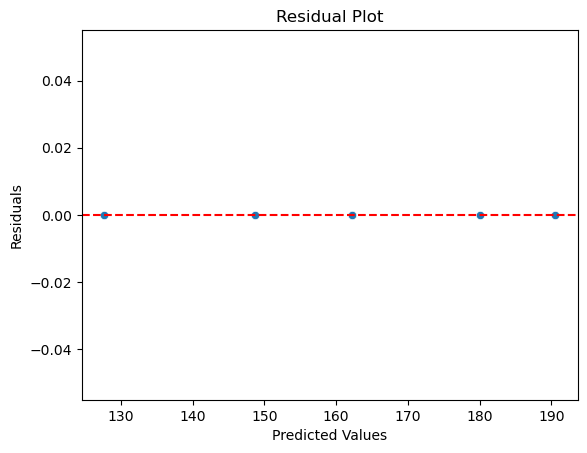

In [61]:
# Plot 1: Residual Plot
# plt.figure(figsize=(8, 6))
residuals = y_test - y_test
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

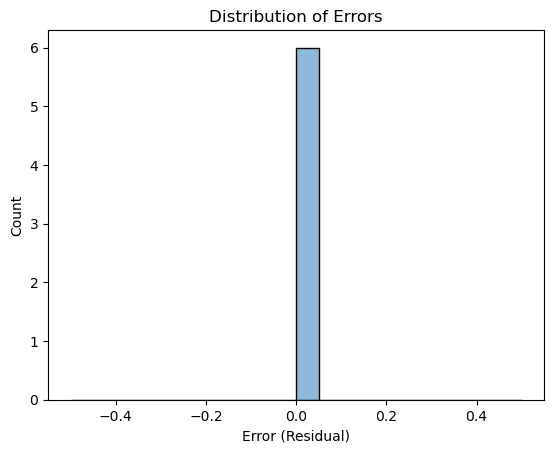

In [63]:
# Plot 2: Error Distribution Plot (Histogram of Errors)
# plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Error (Residual)")
plt.title("Distribution of Errors")
plt.show()

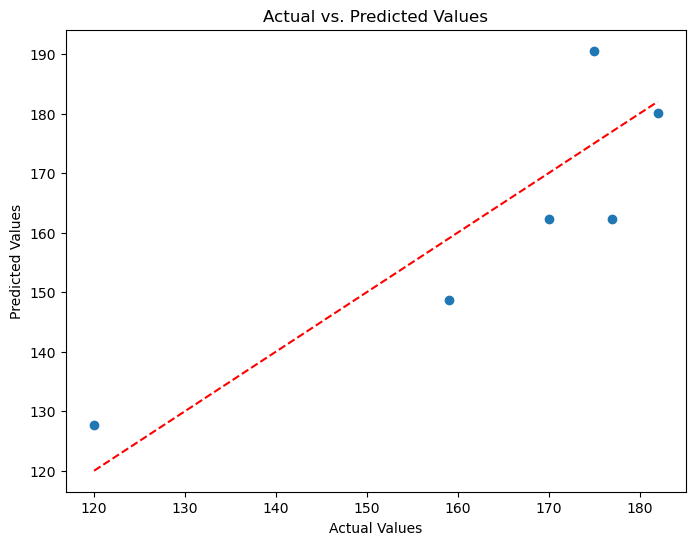

In [65]:
# Plot 3: Actual vs. Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

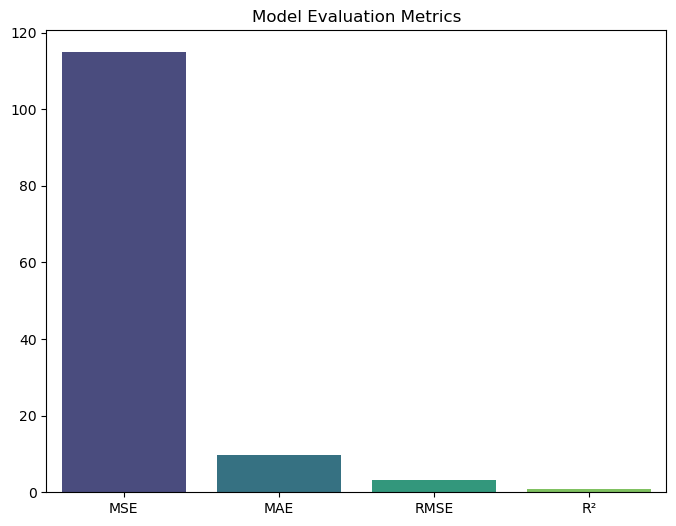

In [69]:
# Plot 4: Bar Plot of Error Metrics
plt.figure(figsize=(8, 6))
metrics = ['MSE', 'MAE', 'RMSE', 'R²']
values = [mean_squared_error, mean_squared_absolute_error, root_mean_squared_error, r2_score_val]
sns.barplot(x=metrics, y=values, hue=metrics, palette="viridis", dodge=False, legend=False)
plt.title("Model Evaluation Metrics")
plt.show()

**Explanation of the Plots**
- Residual Plot: Scatterplot showing residuals around zero.
- Error Distribution Plot: Histogram of errors to show distribution and spread.
- Actual vs. Predicted Plot: Points should lie along the red line if predictions are perfect.
- Bar Plot of Metrics: Comparison of MSE, MAE, RMSE, and R² for a quick overview.

### Plot the trained data and best fit line

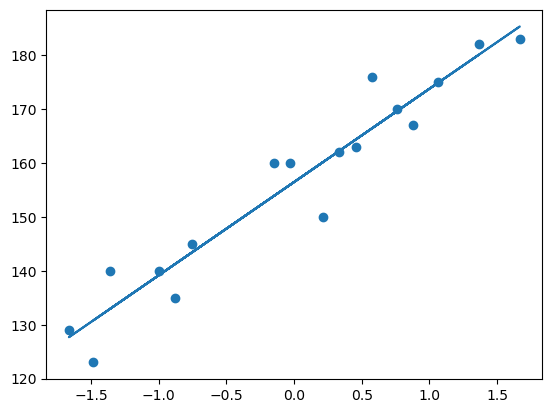

In [46]:
plt.scatter(X_train_scaled,y_train)
plt.plot(X_train_scaled,regression_model.predict(X_train_scaled))

In [49]:
# Revert scaling for visualization purposes
# Inverse transform the scaled training and test data to their original values
X_train_original = scaler.inverse_transform(X_train_scaled)
X_test_original = scaler.inverse_transform(X_test_scaled)

# Predict heights using the standardized model and revert predictions to original scale for comparison
y_pred_line = regression_model.predict(scaler.transform(np.array(df['Weight']).reshape(-1, 1)))

c:\Users\satee\anaconda3\envs\gen_ai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


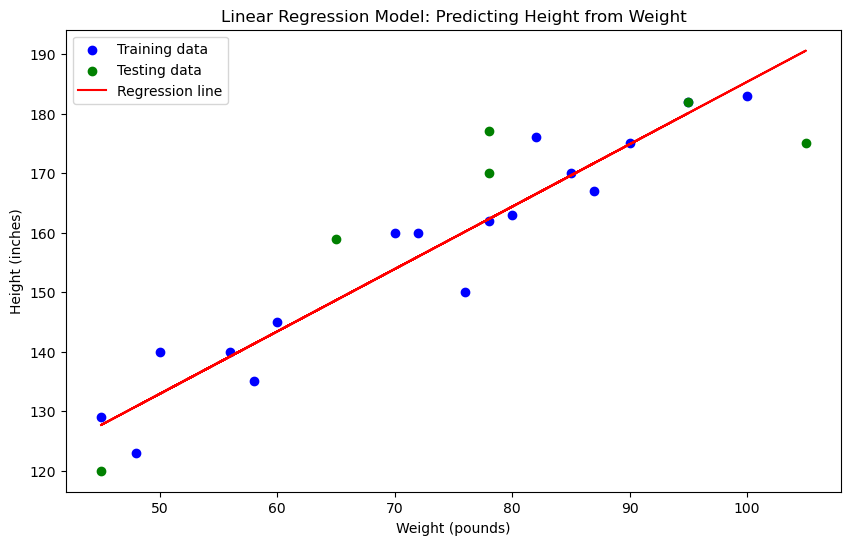

In [50]:
# Plot the original data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_train_original, y_train, color='blue', label='Training data')
plt.scatter(X_test_original, y_test, color='green', label='Testing data')
plt.plot(df['Weight'], y_pred_line, color='red', label='Regression line')

# Adding labels and title
plt.xlabel('Weight (pounds)')
plt.ylabel('Height (inches)')
plt.title('Linear Regression Model: Predicting Height from Weight')
plt.legend()
plt.show()

We plot the original data points for training and test sets and the regression line that shows the model's predictions over the weight range.

- **Blue dots**: Training data points.
- **Green dots**: Testing data points.
- **Red line**: Regression line (the model's predictions), showing the linear relationship the model has identified between `Weight` and `Height`.

#### OLS Linear Regression

In [75]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train_scaled).fit()

In [80]:
prediction=model.predict(X_test_scaled)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [78]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 14 Nov 2024   Prob (F-statistic):                       0.664
Time:                        11:08:32   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\satee\anaconda3\envs\gen_ai\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


#### Prediction For new data

In [83]:
regression_model.predict(scaler.transform([[70]]))

c:\Users\satee\anaconda3\envs\gen_ai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([153.88159699])